In [12]:
import math
import numpy as np
from numpy import *
from numpy.random import normal, uniform
from scipy.stats import multivariate_normal as mv_norm
import matplotlib.pyplot as plt




def function(a_0, a_1, noise_sigma, x):
    """
    Evaluates the real function
    """
    N = len(x)
    if noise_sigma==0:
        # Recovers the true function
        return a_1 + a_0*x
    else:
        return a_1 + a_0*x + normal(0, noise_sigma, N)
    


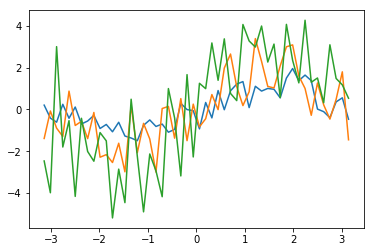

In [29]:
n = 3
for i in range(1, n + 1):
    colormap = plt.cm.gist_ncar
    xs = np.linspace(-np.pi, np.pi, 50)
    ys = sin(xs)+ (normal(0, 0.5, len(xs)))
    plt.plot(xs,i*ys)
    #plt.subplot(211)

plt.show()

In [4]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar
from bokeh.palettes import Category10
output_notebook()

Loading BokehJS ...

In [5]:
def f(x):
    y = sin(x) + (normal(0, 0.5, len(x)))
    return y

def mean(x):
    return np.zeros_like(x)

def kernel(xi, xj, sigma = 1, l = 20):
    X = np.expand_dims(xi,1) - np.expand_dims(xj,0)
    return (sigma ** 2) * np.exp(-(X/l) ** 2)


In [22]:

p = figure(plot_width= 500, plot_height= 500, y_range=(-4, 4))

xs = np.linspace(-np.pi, np.pi, 7)
ys = f(xs)

x_s = np.linspace(-np.pi, np.pi, 50)

K = kernel(xs, xs)
K_s = kernel(xs, x_s)
K_ss = kernel(x_s, x_s)

K_sinv = np.matmul(K_s.T, np.linalg.pinv(K))

mu_s = mean(x_s) + np.matmul(K_sinv, ys - mean(xs))
Sigma_s = K_ss - np.matmul(K_sinv, K_s)

y_true = f(x_s)

p.line(x_s, y_true, line_width=3, color='black', alpha=0.4, line_dash='dashed', legend='True f(x)')

p.cross(xs, ys, size=20, legend='Training data')

stds = np.sqrt(Sigma_s.diagonal())
err_xs = np.concatenate((x_s, np.flip(x_s, 0)))
err_ys = np.concatenate((mu_s + 2 * stds, np.flip(mu_s - 2 * stds, 0)))
p.patch(err_xs, err_ys, alpha=0.2, line_width=0, color='grey', legend='Uncertainty')

for color in Category10[3]:
    y_s = np.random.multivariate_normal(mu_s, Sigma_s)
    p.line(x_s, y_s, line_width=1, color=color)
    
p.line(x_s, mu_s, line_width=3, color='blue', alpha=0.4, legend='Mean')
show(p)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: covariance is not positive-semidefinite.


In [19]:
Xtrain = np.linspace(-np.pi, np.pi, 7).reshape(7,1)
ytrain = np.sin(Xtrain)
Xtest = np.linspace(-np.pi, np.pi, 50)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()

LinAlgError: Matrix is not positive definite

In [ ]:
print()